## Introduction

This project investigates player engagement in Minecraft and whether players subscribe to a game-related newsletter with the purpose of attracting more players to subscribe to the newsletter. To investigate this, a computer science research group set up a Minecraft server and recorded data from each player's sessions. 

To explore how player characteristics and behaviours that are most predictive of subscribing to a game-related newsletter, and how these features differ between various player types, we formulated the question: Can played hours and age predict whether a player subscribes to the newsletter? 

In order to answer this question we will need the variables Age, played_hours to predict the value of subscribe in the players.csv dataset. Because the explanatory variables are quantitative, we will not need to convert them to numeric values for future applications into models. However, we will need to filter out any N/A values for those variables.

We used the players.csv in our analysis as contains all relevant variables to answer our question (played hours, age, and subscription status).

## Methods 

To answer our question, we used K-nearest neighbors classification. This was the preferred method as we aimed to use numerical variables (played hours and age) to predict a categorical variable (subscription status). This would allow our model to accurately answer our predictive question by solely relying on distance based calculations. Additionally, K-nearest neighbors is useful for predicting both linear and non-linear relationships.

We choose to use played hours as a predictor as we believe that players who spend more time playing on the server demonstrate a greater level of interest and engagement to gaming. This higher interest level would increase their likelihood of subscribing to the newsletter. Age may also have a strong correlation as younger players would have more disposable time to read the game-related newsletter and they would be more receptive to learning about other games through the newsletter.

Although player experience may have also been an indicator, we do not know how this data was obtained and may be an unreliable metric. We also chose to exclude gender as it may not be strongly tied to interest. For example, male and female players who spend the same amount of time playing likely have the same interest. 


##### 1. Loading data

After loading the necessary R packages into Jupyter, we conducted an exploratory analysis on our data. To obtain an idea of our demographic, we calculated the average age of each player and the average time spent on the server. 

##### 2. Wrangling

The next step in our investigation would be to wrangle the data. Only the relevant variables were selected and missing values in these columns were dropped. The dataset also had the subscription status stored as a binary logical (either TRUE or FALSE). Because knn-algorithms classified variables to be a factor, the subscription status column was converted into a factor. After that, we investigated whether there was a correlation with the predictor variables (age and hours played) and the subscription status using the wrangled dataset. Figures 1 and 2 are the resulting bar graphs from this investigation. To visualize the distribution on a bar graph, the variables were split into ranges.

##### 3. Finding ideal k-value

The data was split into two sets: a  training set which contained 75% of the data and a testing set which contained 25% of the data. Because K-nearest neighbor relies on distance based calculations, the predictor variables were centered and scaled. To find the k-value which yields the highest accuracy, 5-fold cross validation was used on the training data and k-values through 1-100 were tested in increments of 5 to tune the model. The neighbor values were plotted against accuracy to further visualize this relationship.


##### 4. Collecting metrics from final model

To train the final model, we used a k-value of 21 which yielded the highest accuracy. We then evaluated the accuracy using the predictive model on our testing data and collecting the metrics of the results. We then used a confusion matrix to visualize the results, and calculated the precision and recall with subscribe = TRUE as our desired outcome to evaluate the effectiveness of our model in predicting the subscription status of the players.


In [1]:
# Code that lets me work with tidyverse and other related libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 1a. Data Description: players.csv and its potential issues
In the players dataset, there are 196 observations, and 7 variables in total:

##### experience (character) - The players experience (amateur, pro, veteran, regular, beginner)


##### subscribe (logical) - Indicates if player is subscribed to the newsletter by “TRUE” or “FALSE”.
- Issue: We are unable to perform numerical calculations on logical values.


##### hashedEmail (character) - An encoded email address used as anonymous identification for the player
- Issue: There are visibility issues with these encoded email addresses.

##### played_hours (double) - total number of hours the player has spent on the game
- Issue: There are a lot of players who put zero playtime into the game.

##### name (character) - The players display name

##### gender (character) - The players gender (Male, Female, Non-binary, Prefer not to say, Agender, Two-spirited, Other) 
- Issue: Possible missing values, or those who selected Prefer not to say.


##### Age (double) - The players age in years
- Issue: There are potential NA values that should be removed in certain calculations


In [2]:
# Load the players dataset from a GitHub CSV file and display it
players <- read_csv("https://raw.githubusercontent.com/saclovessoup/dsci-100-project/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### 1b. Data Description: Summary Statistics of played_hours and age

In [3]:
# Calculation of the average hours played and average age of all players
player_mean_values <- players |> summarize(avg_hours_played = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))
player_mean_values

avg_hours_played,avg_age
<dbl>,<dbl>
5.845918,21.13918


### 2a. Wrangling: Dropping NA values and selecting relevant variables

In [4]:
players <- players |>
  mutate(
    subscribe = as_factor(subscribe) #converts subscribe into a factor for classification
  ) |>
  select(subscribe, played_hours, Age) # keep the columns that affects our prediction

players <- players |>
  drop_na() #dropping all the NA values to make all the lines of the data comparable 
players

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,47


### 2b. Figure 1: Investigating the Correlation between Played Hours and Subscription

We can see that the vast majority of players fall into the 0-5 hours of playtime bin. Interestingly, the majority of those players who barely played or did not play at all subscribed to the newsletter. All the players that did not subscribe fall into the first two bins (0-10 hours of playtime). The last three bins exclusively contain players who have subscribed to the newsletter.

subscribe,played_hours,Age,played_bin
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,20-50
TRUE,3.8,17,0-5
FALSE,0.0,17,0-5
TRUE,0.7,21,0-5
TRUE,0.1,21,0-5
TRUE,0.0,17,0-5
TRUE,0.0,19,0-5
FALSE,0.0,21,0-5
TRUE,0.1,47,0-5


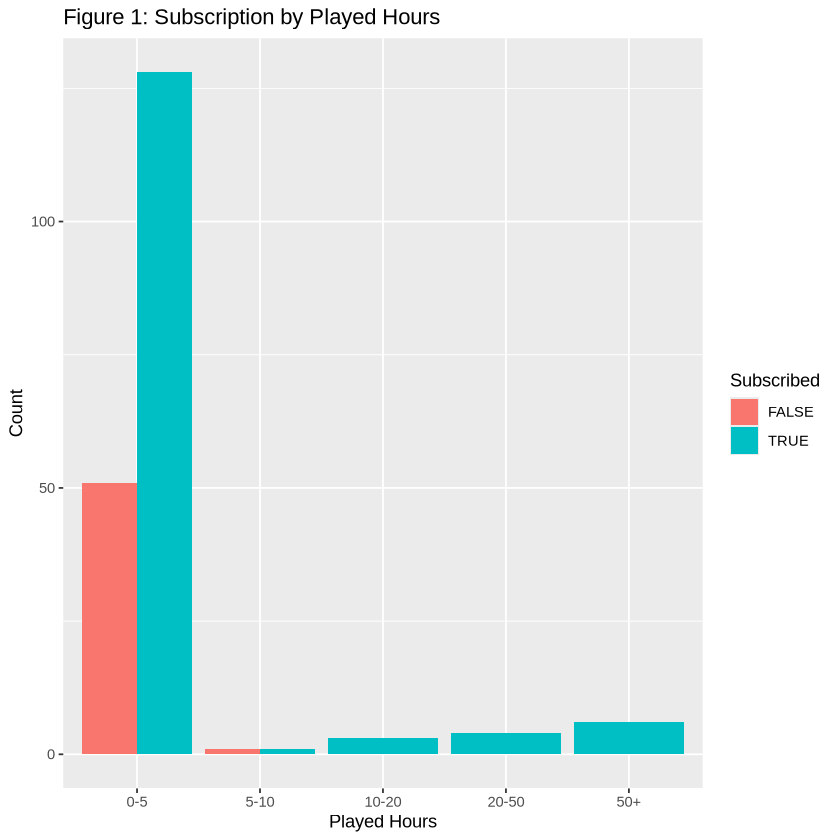

In [5]:
# Creation of played hours bins for all players for the labels of the visualization
players_played_hrs <- players |>
  mutate(played_bin = cut(
    played_hours,
    breaks = c(0, 5, 10, 20, 50, Inf),
    labels = c("0-5", "5-10", "10-20", "20-50", "50+"), include.lowest = TRUE
  ))

# The visualization of the relation between subscription and played hours
players_played_hrs
ggplot(players_played_hrs, aes(x = played_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 1: Subscription by Played Hours",
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed"
  )


### 2c. Figure 2: Investigating the Correlation between Age and Subscription

From this bar graph, we can see that the majority of players that subscribed are between the ages of 15 and 25, and that the majority of players that did not subscribe are from that range as well. 

subscribe,played_hours,Age,age_bin
<fct>,<dbl>,<dbl>,<fct>
TRUE,30.3,9,0-15
TRUE,3.8,17,16-20
FALSE,0.0,17,16-20
TRUE,0.7,21,21-25
TRUE,0.1,21,21-25
TRUE,0.0,17,16-20
TRUE,0.0,19,16-20
FALSE,0.0,21,21-25
TRUE,0.1,47,41-50


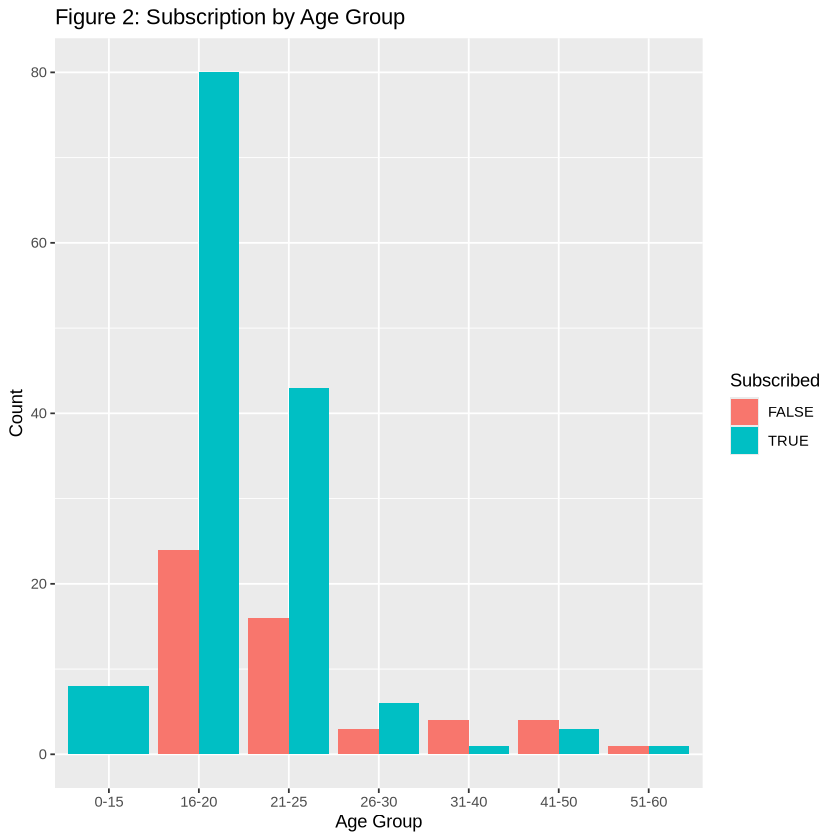

In [6]:
# Creation of age range bins for all players for the labels of the visualization
players_age <- players |>
  mutate(age_bin = cut(
    Age,
    breaks = c(0, 15, 20, 25, 30, 40, 50, 60, Inf),
    labels = c("0-15", "16-20", "21-25", "26-30", "31-40", "41-50", "51-60", "60+")
  ))
players_age

# The visualization of the relation between subscription and age
ggplot(players_age, aes(x = age_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Figure 2: Subscription by Age Group",
    x = "Age Group",
    y = "Count",
    fill = "Subscribed"
  )


### 3a. Splitting into Training and Testing Data, Creating the recipe, performing our cross-validation

In [7]:
# Splitting the dataset into training and testing sets with stratification by subscription status
set.seed(1)

player_split <- initial_split(players, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)


In [8]:
# Creation of a recipe to model subscription using played hours and age, with predictors centered and scaled
set.seed(1)
player_recipe <- recipe(subscribe ~ played_hours + Age, 
                        data = player_train) |> 
  step_scale(all_predictors()) |>
  step_center(all_predictors())
player_recipe




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [9]:
# Definion of a KNN classification model with tunable number of neighbors
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [10]:
# Performing 5-fold cross-validation to tunne KNN neighbours and extract accuracy metrics
set.seed(1)
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

# Defining a modelling workflow
knn_results <- workflow() |> 
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = player_vfold, grid = tibble(neighbors = seq(1, 100, 5))) |>
  collect_metrics()

# Filtering results to keep only accuracy metrics
accuracies <- knn_results |> filter(.metric == "accuracy")


### 3b. Figure 3: Finding best k value using a line visualization

From this graph, we can see that the best k value is between 20 and 25. The best k value was pulled in the code cell below this visualization.

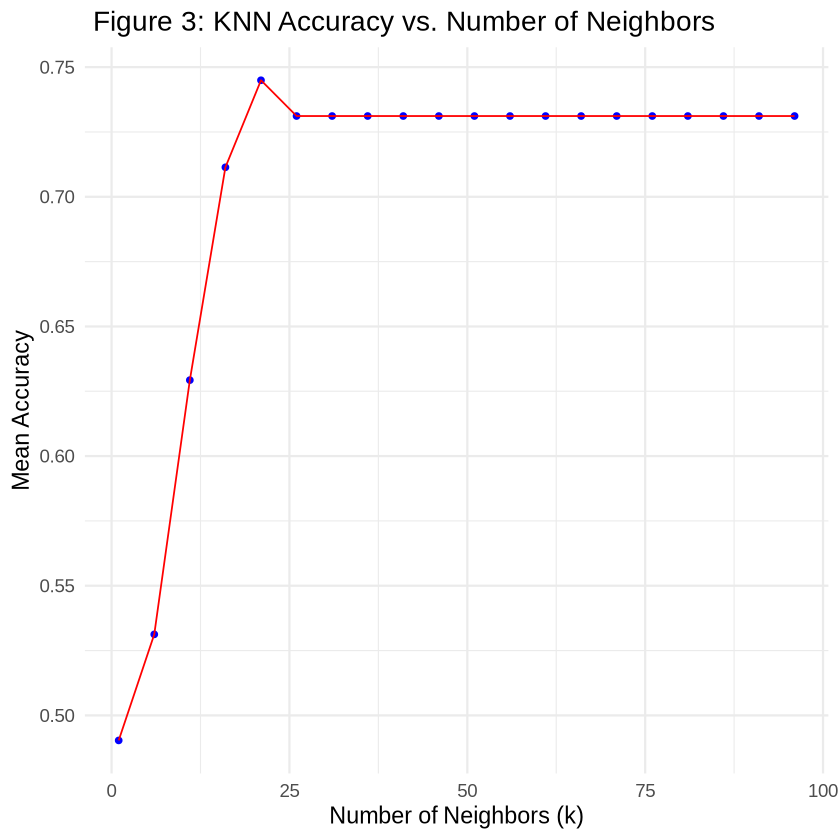

In [11]:
# Plotting mean KNN accuracy against the number of neighbours to visualize model performance
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point(color = "blue") +
  geom_line(color = "red") +
  labs(
    title = " Figure 3: KNN Accuracy vs. Number of Neighbors",
    x = "Number of Neighbors (k)",
    y = "Mean Accuracy"
  ) +
  theme_minimal(base_size = 14)

accuracy_vs_k


In [12]:
# Identifying the number of neighbours (k) that gives the highest accuracy
best_k <- accuracies |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_k


[1] 21

### 4a. Creating a new model with our best k value and using it on testing data

In [13]:
# Fitting the final KNN model using the best number of neighbours (best_k) on the training data
set.seed(1)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

# Defining a modelling workflow
knn_fit <- workflow() |>
  add_recipe(player_recipe) |>
  add_model(knn_spec) |>
  fit(data = player_train)
knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2689655
Best kernel: rectangular
Best k: 21

### 4b. Collecting the accuracy value, generating our confusion matrix, precision value, and recall value

The code cells below are in order of the title. The results of these cells are mentioned in the discussion.

In [18]:
# Generating predictions on the test set and calculation of the accuracy of the final KNN model
set.seed(1)
test_preds <- predict(knn_fit, player_test) |>
  bind_cols(player_test)


test_metrics <- test_preds |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")
test_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [15]:
# Calculation of the confusion matrix to evaluate classification performance on the test set
confusion_matrix <- conf_mat(test_preds, truth = subscribe, estimate = .pred_class)
confusion_matrix


          Truth
Prediction FALSE TRUE
     FALSE     1    1
     TRUE     12   35

In [16]:
test_preds |> pull(subscribe) |> levels()

# Because our desired outcome is the SECOND event (subscribe = TRUE) we will use event_level = "second" in our precision and recall calculations
# Calculation of precision for the class that appears second in the factor levels of 'subscribe'
test_precision  <- test_preds |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

test_precision


[1] "FALSE" "TRUE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7446809


In [17]:
# Calculation of recall for the class listed SECOND in the factor levels of 'subscribe'
test_recall <- test_preds |> 
recall(truth = subscribe, estimate = .pred_class, event_level = "second")

test_recall


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9722222


## Discussion

After performing our cross validation, we found that the best k value was 21 neighbours. 
The final accuracy for the test predictions was 73.5 percent, the precision 74.5 percent, and the recall was 97.2 percent (rounded to one decimal point). In the confusion matrix, there were 12 false positives, 1 true negative, 1 false negatives, and 35 true positives. 

The recall percentage being so high was something that was not expected but can be explained by the miniscule number of false negatives in the testing predictions that is used in the recall calculation. The precision percentage is much closer to the accuracy percentage with a 1 percent difference. A potential reason for the lack of negatives in the confusion matrix could be related to the dataset involved as a majority of people did not log any hours into the server even after registration. Further testing should include a dataset where the majority of people logged at least some playing time on the Minecraft server to refine our predictive model even more. 

The accuracy of this model is reasonably sufficient for a number of reasons. The first reason is that the goal of this model is marketing/engagement based. There are no devastating consequences to inaccuracies such as health risks or legal harm so a model that is correct around 75 percent of the time will be a net positive for the user of this model. Secondly, because subscription is a voluntary process, predicting such an unpredictive type of human behaviour is difficult in the first place. Therefore, 73.5 percent accuracy is quite good for all intents and purposes. The implication of this result is that age and played hours are adequate exploratory variables for predicting whether a player subscribes to the game-related newsletter. Therefore, in the future the collection of ages and played hours as data is crucial for attracting players to subscribe to the newsletter






## Resources used

The `cut()` function used to create bins for the initial visualization was referenced from this resource:    
(https://www.r-bloggers.com/2024/03/mastering-data-segmentation-a-guide-to-using-the-cut-function-in-r/)                                              (https://www.youtube.com/watch?v=_2rtCrrclbQ).
